In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Загрузка данных
file_path = r"C:\Users\Ilya\Desktop\AES\code\ldpe_nn\real_model\dataset\merged_tables.csv"  # <-- ЗАМЕНИ на свой путь!
df = pd.read_csv(file_path)

print("Shape:", df.shape)
display(df.columns)


Shape: (1206, 45)


Index(['Итерация', 'NGRADE', 'INIT-DEC-TBPND_PRE_EXP',
       'INIT-DEC-TAPND_PRE_EXP', 'INIT-DEC-TOPPI_PRE_EXP',
       'INIT-DEC-TOPND_PRE_EXP', 'INIT-DEC-TAPPI_PRE_EXP',
       'INIT-DEC-TBPEH_PRE_EXP', 'INIT-DEC-TBPIN_PRE_EXP',
       'INIT-DEC-DTBP_PRE_EXP', 'INIT-DEC-ETHYLENE_PRE_EXP',
       'CHAIN-INI-ETHYLENE_PRE_EXP', 'CHAIN-INI-PROPYLEN_PRE_EXP',
       'PROPAGATION-ETHYLENE-ETHYLENE_PRE_EXP',
       'PROPAGATION-ETHYLENE-PROPYLEN_PRE_EXP',
       'PROPAGATION-PROPYLEN-ETHYLENE_PRE_EXP',
       'PROPAGATION-PROPYLEN-PROPYLEN_PRE_EXP',
       'CHAT-MON-ETHYLENE-ETHYLENE_PRE_EXP',
       'CHAT-MON-ETHYLENE-PROPYLEN_PRE_EXP',
       'CHAT-MON-PROPYLEN-ETHYLENE_PRE_EXP',
       'CHAT-MON-PROPYLEN-PROPYLEN_PRE_EXP', 'CHAT-AGENT-ETHYLENE-PAL_PRE_EXP',
       'CHAT-AGENT-PROPYLEN-PAL_PRE_EXP', 'TERM-DIS-ETHYLENE-ETHYLENE_PRE_EXP',
       'TERM-DIS-ETHYLENE-PROPYLEN_PRE_EXP',
       'TERM-DIS-PROPYLEN-ETHYLENE_PRE_EXP',
       'TERM-DIS-PROPYLEN-PROPYLEN_PRE_EXP',
       'TERM-COMB-

In [6]:
# Настрой списки под свою структуру данных
input_cols = ['Итерация', 'NGRADE', 'INIT-DEC-TBPND_PRE_EXP',
       'INIT-DEC-TAPND_PRE_EXP', 'INIT-DEC-TOPPI_PRE_EXP',
       'INIT-DEC-TOPND_PRE_EXP', 'INIT-DEC-TAPPI_PRE_EXP',
       'INIT-DEC-TBPEH_PRE_EXP', 'INIT-DEC-TBPIN_PRE_EXP',
       'INIT-DEC-DTBP_PRE_EXP', 'INIT-DEC-ETHYLENE_PRE_EXP',
       'CHAIN-INI-ETHYLENE_PRE_EXP', 'CHAIN-INI-PROPYLEN_PRE_EXP',
       'PROPAGATION-ETHYLENE-ETHYLENE_PRE_EXP',
       'PROPAGATION-ETHYLENE-PROPYLEN_PRE_EXP',
       'PROPAGATION-PROPYLEN-ETHYLENE_PRE_EXP',
       'PROPAGATION-PROPYLEN-PROPYLEN_PRE_EXP',
       'CHAT-MON-ETHYLENE-ETHYLENE_PRE_EXP',
       'CHAT-MON-ETHYLENE-PROPYLEN_PRE_EXP',
       'CHAT-MON-PROPYLEN-ETHYLENE_PRE_EXP',
       'CHAT-MON-PROPYLEN-PROPYLEN_PRE_EXP', 'CHAT-AGENT-ETHYLENE-PAL_PRE_EXP',
       'CHAT-AGENT-PROPYLEN-PAL_PRE_EXP', 'TERM-DIS-ETHYLENE-ETHYLENE_PRE_EXP',
       'TERM-DIS-ETHYLENE-PROPYLEN_PRE_EXP',
       'TERM-DIS-PROPYLEN-ETHYLENE_PRE_EXP',
       'TERM-DIS-PROPYLEN-PROPYLEN_PRE_EXP',
       'TERM-COMB-ETHYLENE-ETHYLENE_PRE_EXP',
       'TERM-COMB-ETHYLENE-PROPYLEN_PRE_EXP',
       'TERM-COMB-PROPYLEN-ETHYLENE_PRE_EXP',
       'TERM-COMB-PROPYLEN-PROPYLEN_PRE_EXP', 'B-SCISSION-ETHYLENE_PRE_EXP',
       'B-SCISSION-PROPYLEN_PRE_EXP', 'CHAT-POL-ETHYLENE-ETHYLENE_PRE_EXP',
       'CHAT-POL-ETHYLENE-PROPYLEN_PRE_EXP',
       'CHAT-POL-PROPYLEN-ETHYLENE_PRE_EXP',
       'CHAT-POL-PROPYLEN-PROPYLEN_PRE_EXP',
       'SC-BRANCH-ETHYLENE-ETHYLENE_PRE_EXP',
       'SC-BRANCH-ETHYLENE-PROPYLEN_PRE_EXP',
       'SC-BRANCH-PROPYLEN-ETHYLENE_PRE_EXP',
       'SC-BRANCH-PROPYLEN-PROPYLEN_PRE_EXP']# если у тебя 0-9, а не 1-8!

output_cols = ['LDPE', 'MWW', 'MWN', 'FSCB']

all_cols = input_cols + output_cols
print("Input columns:", input_cols)
print("Output columns:", output_cols)



Input columns: ['Итерация', 'NGRADE', 'INIT-DEC-TBPND_PRE_EXP', 'INIT-DEC-TAPND_PRE_EXP', 'INIT-DEC-TOPPI_PRE_EXP', 'INIT-DEC-TOPND_PRE_EXP', 'INIT-DEC-TAPPI_PRE_EXP', 'INIT-DEC-TBPEH_PRE_EXP', 'INIT-DEC-TBPIN_PRE_EXP', 'INIT-DEC-DTBP_PRE_EXP', 'INIT-DEC-ETHYLENE_PRE_EXP', 'CHAIN-INI-ETHYLENE_PRE_EXP', 'CHAIN-INI-PROPYLEN_PRE_EXP', 'PROPAGATION-ETHYLENE-ETHYLENE_PRE_EXP', 'PROPAGATION-ETHYLENE-PROPYLEN_PRE_EXP', 'PROPAGATION-PROPYLEN-ETHYLENE_PRE_EXP', 'PROPAGATION-PROPYLEN-PROPYLEN_PRE_EXP', 'CHAT-MON-ETHYLENE-ETHYLENE_PRE_EXP', 'CHAT-MON-ETHYLENE-PROPYLEN_PRE_EXP', 'CHAT-MON-PROPYLEN-ETHYLENE_PRE_EXP', 'CHAT-MON-PROPYLEN-PROPYLEN_PRE_EXP', 'CHAT-AGENT-ETHYLENE-PAL_PRE_EXP', 'CHAT-AGENT-PROPYLEN-PAL_PRE_EXP', 'TERM-DIS-ETHYLENE-ETHYLENE_PRE_EXP', 'TERM-DIS-ETHYLENE-PROPYLEN_PRE_EXP', 'TERM-DIS-PROPYLEN-ETHYLENE_PRE_EXP', 'TERM-DIS-PROPYLEN-PROPYLEN_PRE_EXP', 'TERM-COMB-ETHYLENE-ETHYLENE_PRE_EXP', 'TERM-COMB-ETHYLENE-PROPYLEN_PRE_EXP', 'TERM-COMB-PROPYLEN-ETHYLENE_PRE_EXP', 'TERM-COMB-

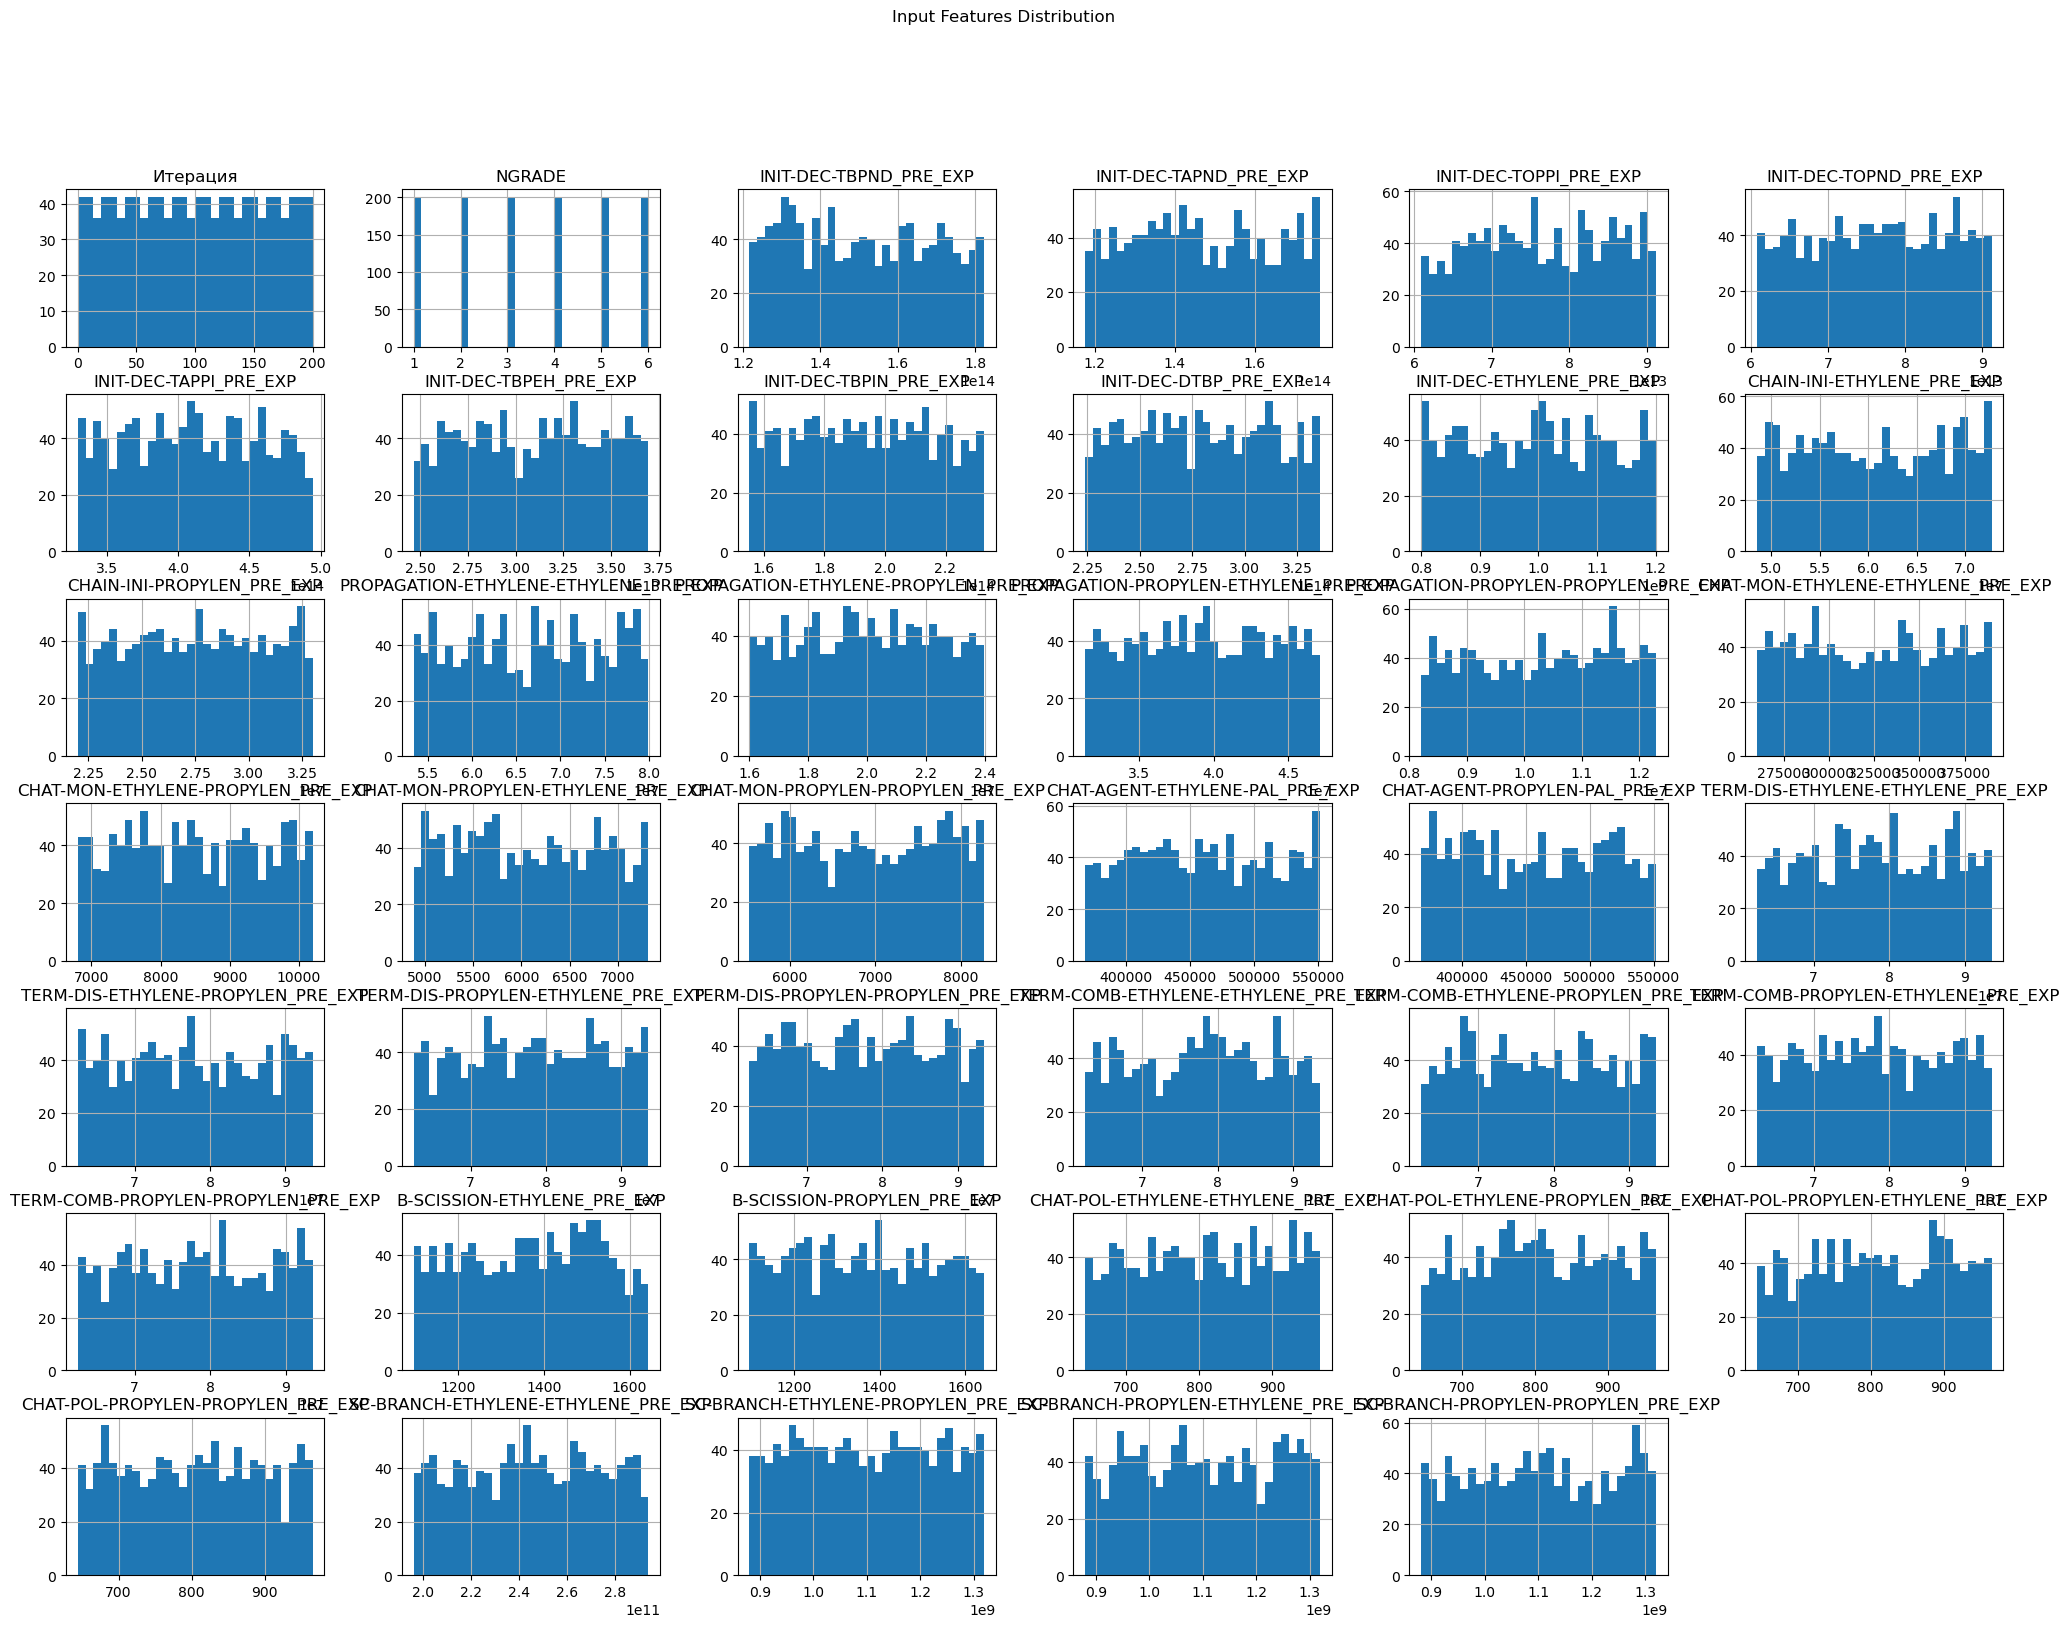

In [10]:
df[input_cols].hist(bins=30, figsize=(25,18))
plt.suptitle('Input Features Distribution')
plt.show()


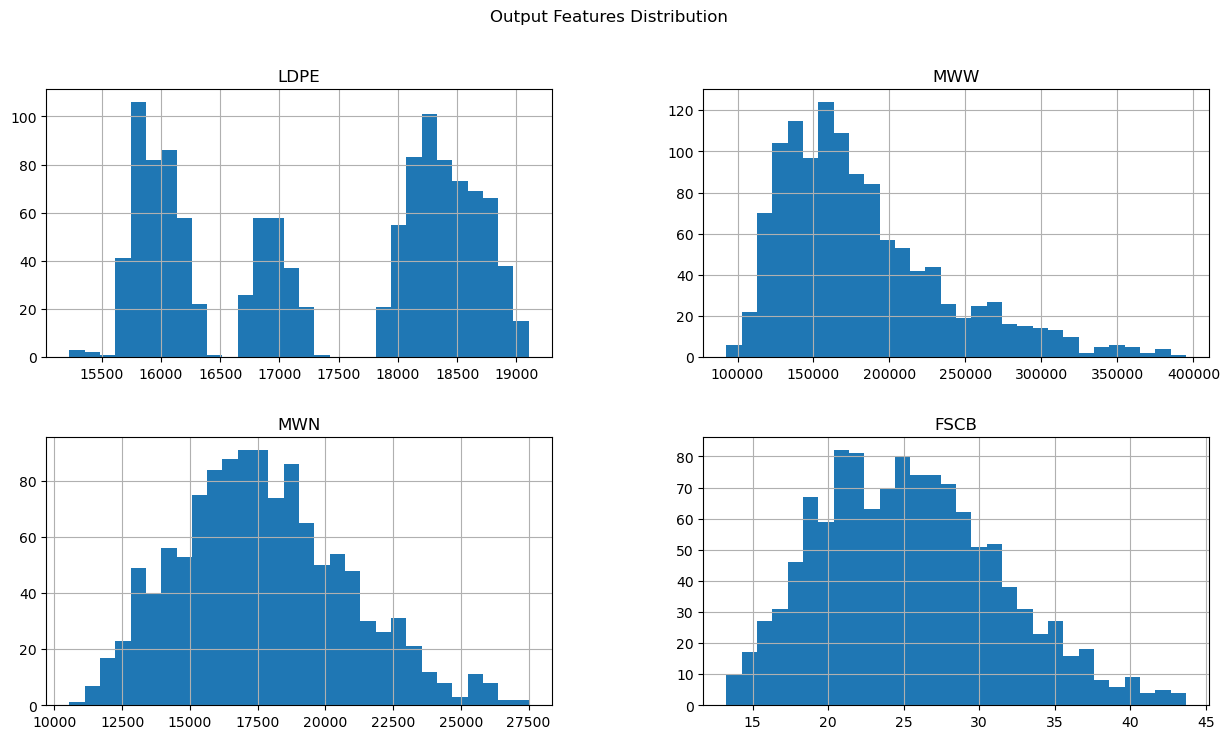

In [11]:
df[output_cols].hist(bins=30, figsize=(15,8))
plt.suptitle('Output Features Distribution')
plt.show()


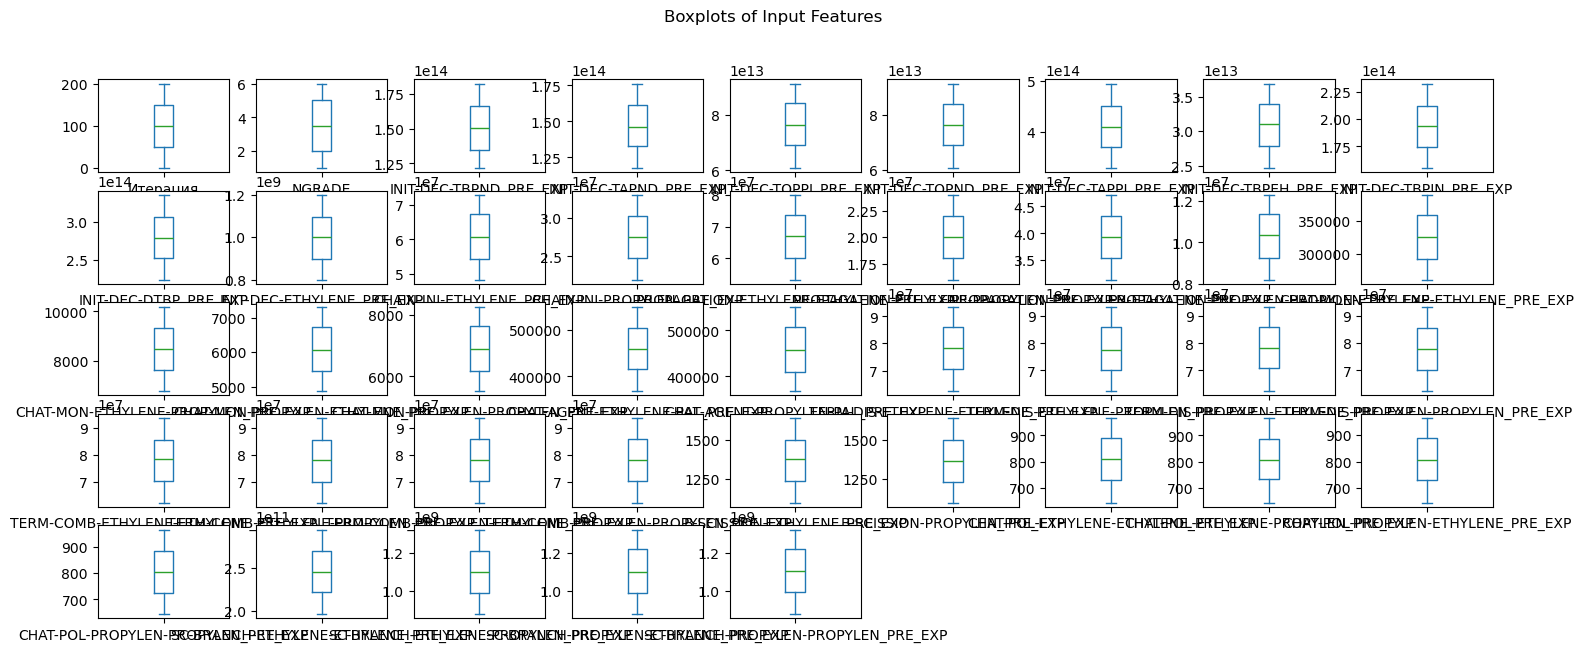

In [17]:
df[input_cols].plot(kind='box', subplots=True, layout=(5,9), figsize=(18,7), sharex=False, sharey=False)
plt.suptitle('Boxplots of Input Features')
plt.show()


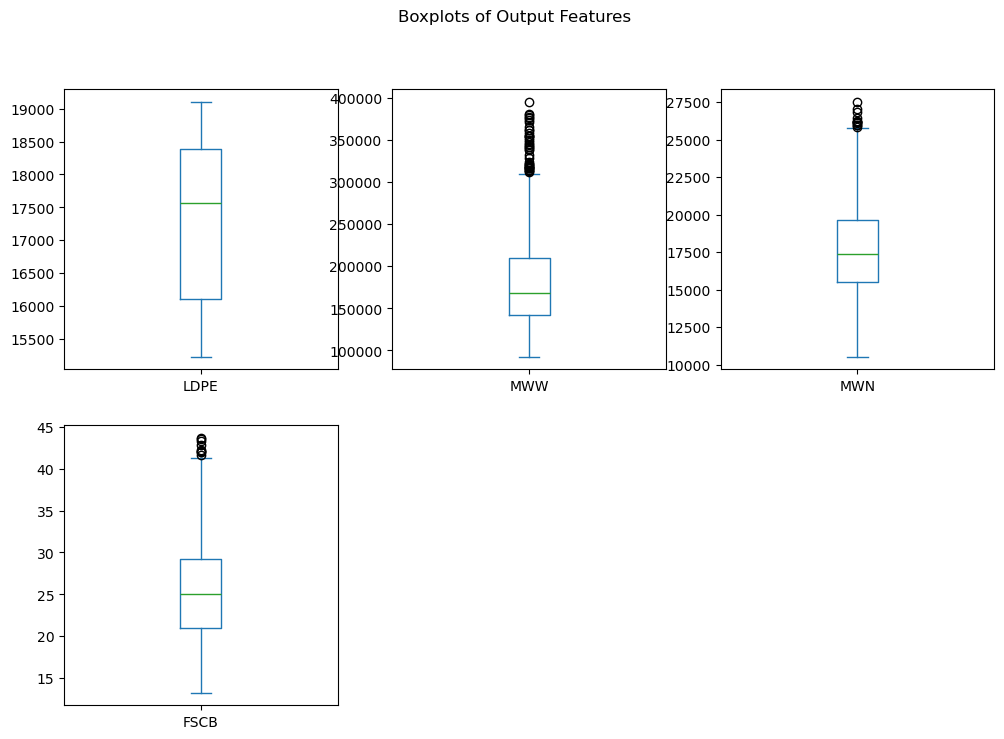

In [14]:
df[output_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), sharex=False, sharey=False)
plt.suptitle('Boxplots of Output Features')
plt.show()


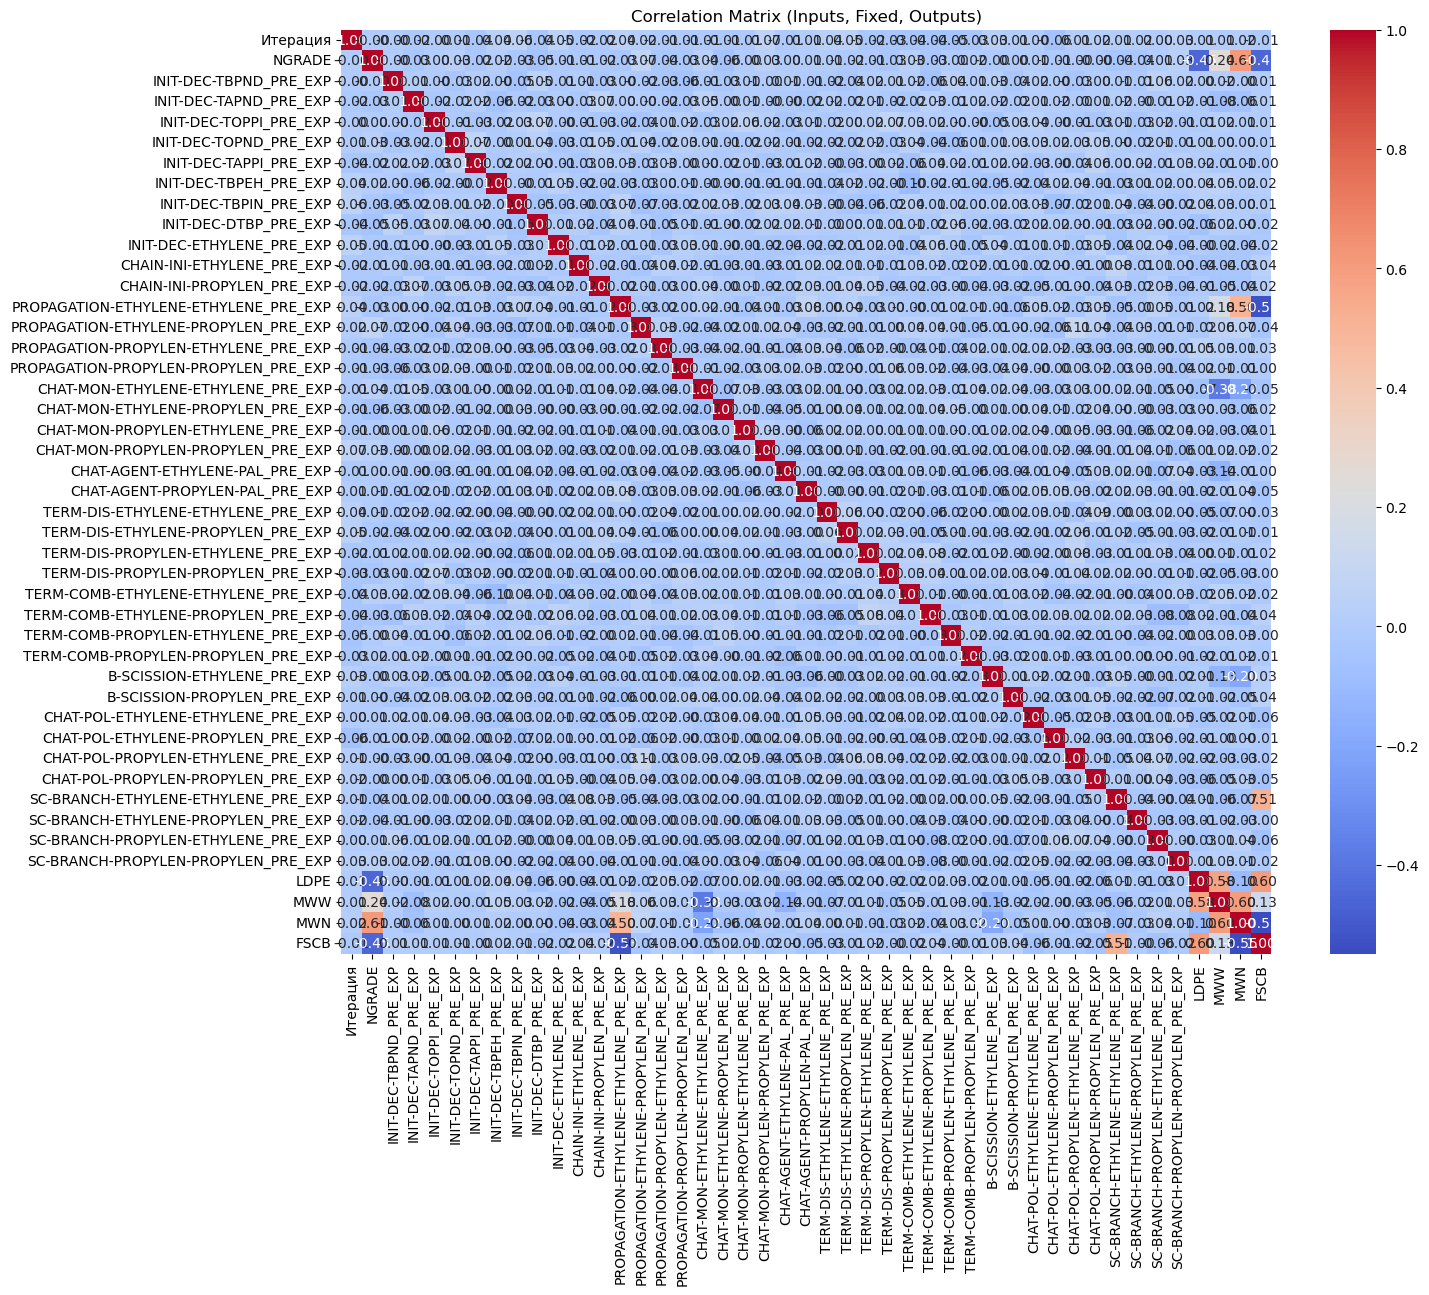

In [19]:
plt.figure(figsize=(15, 12))
corr = df[input_cols + output_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Inputs, Fixed, Outputs)')
plt.show()


c:\Users\Ilya\.conda\envs\ldpe_nn\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


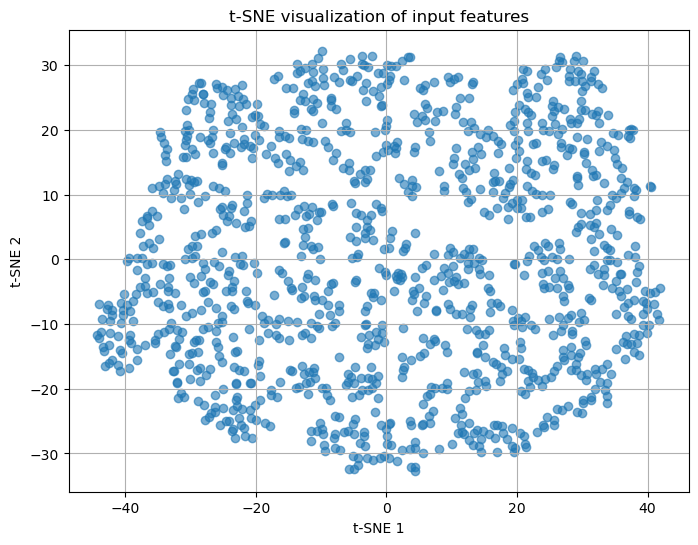

In [20]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(df[input_cols].values)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.6)
plt.title("t-SNE visualization of input features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid()
plt.show()


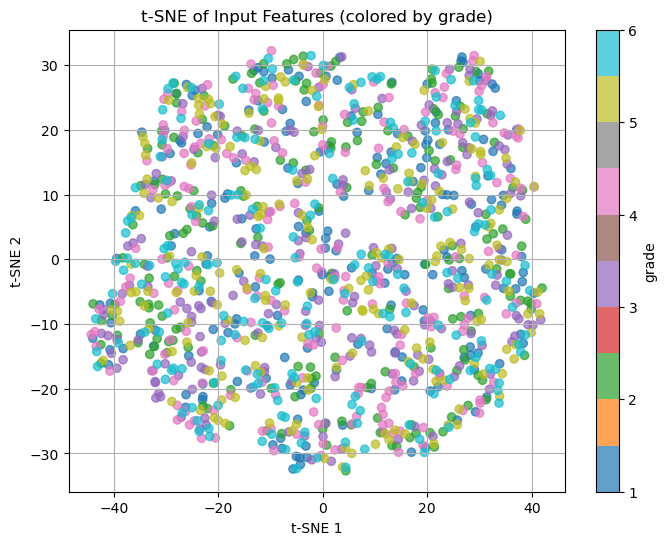

In [26]:
if 'NGRADE' in df.columns:
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df['NGRADE'], cmap='tab10', alpha=0.7)
    plt.title("t-SNE of Input Features (colored by grade)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.colorbar(scatter, label='grade')
    plt.grid()
    plt.show()
